In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-in-tech-survey/survey.csv


# Mental Health Tech Survey EDA  

## importing libraries 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

# Loading and analysing the data

In [3]:
df=pd.read_csv('/kaggle/input/mental-health-in-tech-survey/survey.csv')
df=df.drop('Timestamp',axis=1)
df=df.drop('comments',axis=1)
print(df.shape )
print(df.describe())
df.info()

(1259, 25)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   state                      744 non-null    object
 4   self_employed              1241 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             995 non-null    object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-n

## Filtering the data

In [4]:
df=df[(df['Age']>18) & (df['Age']<70)]
df = df.reset_index(drop=True)
print(df.describe())
df.isna().sum()

               Age
count  1243.000000
mean     32.123894
std       7.145538
min      19.000000
25%      27.000000
50%      31.000000
75%      36.000000
max      65.000000


Age                            0
Gender                         0
Country                        0
state                        509
self_employed                 18
family_history                 0
treatment                      0
work_interfere               260
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

# Dealing with the Gender Column using mapping 

In [5]:
mapp = {
    'M': 'Male', 'male': 'Male', 'Male-ish': 'Male', 'maile': 'Male',
    'Cis Male': 'Male', 'm': 'Male', 'Mal': 'Male', 'Male (CIS)': 'Male',
    'Make': 'Male', 'Guy (-ish)': 'Male', 'Man': 'Male', 'msle': 'Male',
    'Guy (-ish) ^_^':'Others', 'Male ':'Male' ,'Mail':'Male' ,'cis male':'Male',
    'Malr':'Male',
    'Femake': 'Female', 'f': 'Female', 'F': 'Female', 'female': 'Female',
    'Female ':'Female','cis-female/femme':'Female',
    'woman': 'Female', 'Woman': 'Female','Female (cis)':'Female',
    'cis-female': 'Female','femail':'Female','Trans-female':'Female',
    'Cis Man':'Male','Cis Female':'Female','queer/she/they':'Others',
    'non-binary':'Others',
    'ostensibly male, unsure what that really means':'Others',
    'Nah': 'Others', 'Enby': 'Others', 'fluid': 'Others',
    'Genderqueer': 'Others', 'Androgyne': 'Others', 'Agender': 'Others',
    'male leaning androgynous': 'Others', 'Trans woman': 'Others',
    'Neuter':'Others','Female (trans)':'Others','queer':'Others'
}
df['Gender'] = df['Gender'].replace(mapp)
print(df['Gender'])
print(df['Gender'].unique())

0       Female
1         Male
2         Male
3         Male
4         Male
         ...  
1238      Male
1239      Male
1240      Male
1241    Female
1242      Male
Name: Gender, Length: 1243, dtype: object
['Female' 'Male' 'Others']


In [6]:
date_map={'6-25':np.nan,'1-5':np.nan}
df['no_employees']=df['no_employees'].replace(date_map)
print(df['no_employees'])

0                  NaN
1       More than 1000
2                  NaN
3               26-100
4              100-500
             ...      
1238            26-100
1239            26-100
1240    More than 1000
1241           100-500
1242            26-100
Name: no_employees, Length: 1243, dtype: object


In [7]:
num_emp=[]
for n in df['no_employees'].astype(str):
    n=n.strip()
    if n=='nan':
        num_emp.append(np.nan)
    elif n=='More than 1000':
         num_emp.append(1000) 
    else:
        a=n.split('-')
        num_emp.append((int(a[0])+int(a[1]))//2)
# print(num_emp,len(num_emp))
df['no_employees']=num_emp
print(df['no_employees'])
print(len(df))
        

0          NaN
1       1000.0
2          NaN
3         63.0
4        300.0
         ...  
1238      63.0
1239      63.0
1240    1000.0
1241     300.0
1242      63.0
Name: no_employees, Length: 1243, dtype: float64
1243


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [8]:
mapping={'Yes': 1,'No':0 }
df[['family_history','treatment','remote_work','tech_company','obs_consequence']]=df[['family_history','treatment','remote_work','tech_company','obs_consequence']].replace(mapping)
print(df[['family_history','treatment','remote_work','tech_company','obs_consequence']].describe())

       family_history    treatment  remote_work  tech_company  obs_consequence
count     1243.000000  1243.000000  1243.000000   1243.000000      1243.000000
mean         0.391794     0.505229     0.294449      0.819791         0.144811
std          0.488348     0.500174     0.455978      0.384516         0.352052
min          0.000000     0.000000     0.000000      0.000000         0.000000
25%          0.000000     0.000000     0.000000      1.000000         0.000000
50%          0.000000     1.000000     0.000000      1.000000         0.000000
75%          1.000000     1.000000     1.000000      1.000000         0.000000
max          1.000000     1.000000     1.000000      1.000000         1.000000


/tmp/ipykernel_36/262476981.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['family_history','treatment','remote_work','tech_company','obs_consequence']]=df[['family_history','treatment','remote_work','tech_company','obs_consequence']].replace(mapping)


# For Missing Values 

In [9]:
mode1=df['self_employed'].mode()[0]
df['self_employed']=df['self_employed'].fillna(mode1)
df['self_employed']=df['self_employed'].replace(mapping)
print(df['self_employed'])
mode2=df['work_interfere'].mode()[0]
df['work_interfere']=df['work_interfere'].fillna(mode2)
print(df['work_interfere'])
df['state']=df['state'].fillna('Unknown')

0       0
1       0
2       0
3       0
4       0
       ..
1238    0
1239    0
1240    0
1241    0
1242    0
Name: self_employed, Length: 1243, dtype: int64
0           Often
1          Rarely
2          Rarely
3           Often
4           Never
          ...    
1238    Sometimes
1239        Often
1240    Sometimes
1241    Sometimes
1242    Sometimes
Name: work_interfere, Length: 1243, dtype: object


/tmp/ipykernel_36/1756417134.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['self_employed']=df['self_employed'].replace(mapping)


# For Categorical Columns

In [10]:
print(df['work_interfere'].unique())
work_map={'Often':1,'Sometimes':0.75,'Rarely':0.25,'Never':0}
df['work_interfere']=df['work_interfere'].replace(work_map)

['Often' 'Rarely' 'Never' 'Sometimes']


/tmp/ipykernel_36/3443507401.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['work_interfere']=df['work_interfere'].replace(work_map)


In [11]:
cols=['benefits','wellness_program','seek_help','anonymity','mental_vs_physical',
      'care_options','mental_health_consequence','phys_health_consequence',
      'mental_health_interview','phys_health_interview','leave']
cols_replace={'Don\'t know':'Unknown','Maybe':'Unsure','Not sure':'Unsure'}
df[cols]=df[cols].replace(cols_replace)
print(df[cols].describe())

       benefits wellness_program seek_help anonymity mental_vs_physical  \
count      1243             1243      1243      1243               1243   
unique        3                3         3         3                  3   
top         Yes               No        No   Unknown            Unknown   
freq        471              832       638       809                568   

       care_options mental_health_consequence phys_health_consequence  \
count          1243                      1243                    1243   
unique            3                         3                       3   
top              No                        No                      No   
freq            496                       484                     915   

       mental_health_interview phys_health_interview    leave  
count                     1243                  1243     1243  
unique                       3                     3        5  
top                         No                Unsure  Unknown  
fr

In [12]:
col2=['supervisor','coworkers']
col2map={'Yes':1,'No':0,'Some of them':0.5}
df[col2]=df[col2].replace(col2map)

/tmp/ipykernel_36/2853743801.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col2]=df[col2].replace(col2map)


### no outliers were found in both age and no_employees column

# Plotting, Visualizing Data

## Univariate Analysis

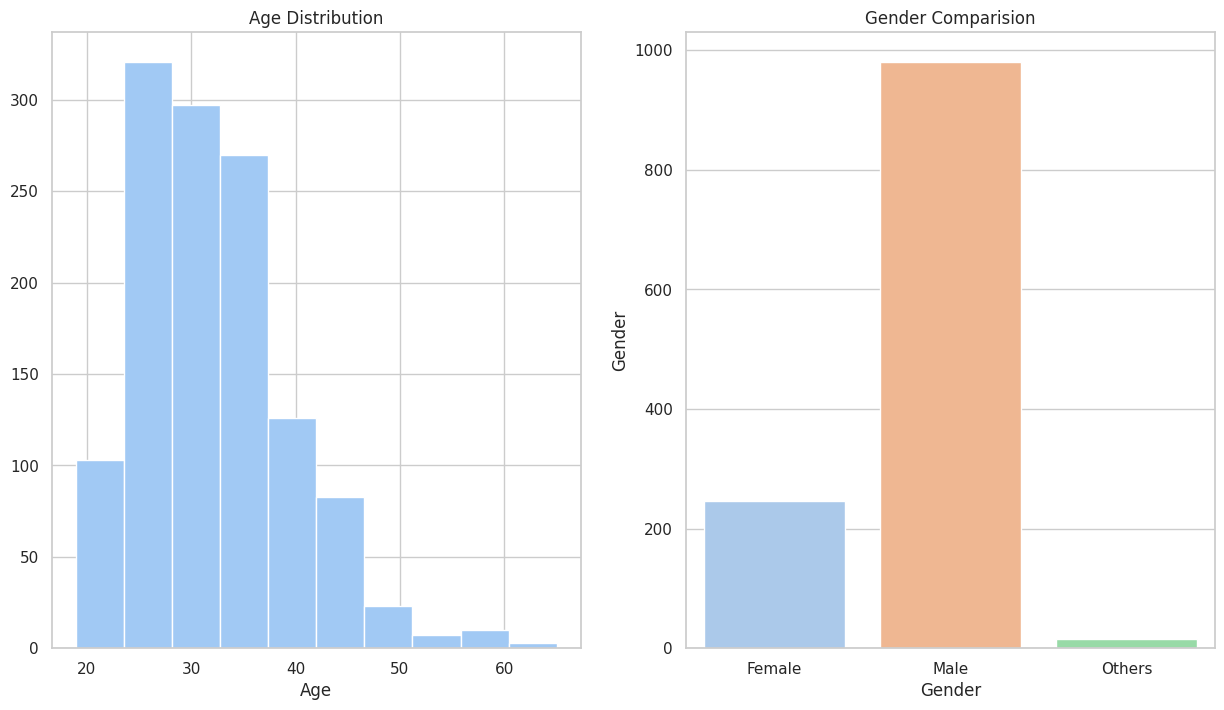

In [13]:
sns.set_theme(style="whitegrid", palette='pastel')
fig,axs=plt.subplots(1,2,figsize=(15,8))
axs[0].hist(df['Age'],bins=10)
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age')

sns.countplot(data=df, x='Gender',ax=axs[1])
axs[1].set_title('Gender Comparision')
axs[1].set_ylabel('Gender')

plt.show()

In [14]:
print("mean age=")
meanage = df['Age'].mean()
print(meanage)

mean age=
32.123893805309734


In [30]:
print("male percentage=")
percent_male = (df['Gender'].eq('Male').mean()) * 100
print(f"{percent_male:.2f}%")
print("female percentage=")
percent_female = (df['Gender'].eq('Female').mean()) * 100
print(f"{percent_female:.2f}%")
print("others percentage=")
percent_oth = (df['Gender'].eq('Others').mean()) * 100
print(f"{percent_oth:.2f}%")

male percentage=
78.92%
female percentage=
19.79%
others percentage=
1.29%


### filtering countries for ease

In [15]:
country_counts = df['Country'].value_counts()
valid_countries = country_counts[country_counts > 5].index

df['Country'] = df['Country'].apply(
    lambda c: c if c in valid_countries else 'Other'
)

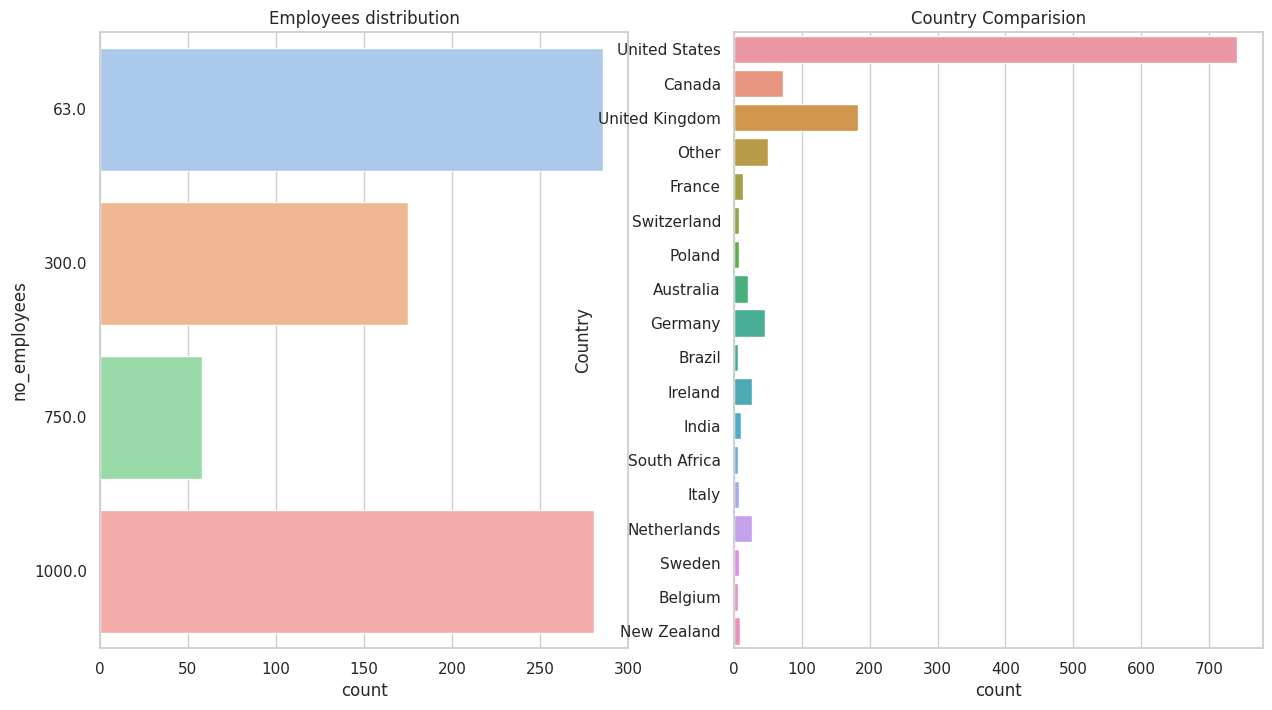

In [16]:
fig,axs=plt.subplots(1,2,figsize=(15,8))
sns.countplot(data=df, y='no_employees',ax=axs[0])
axs[0].set_title('Employees distribution')

sns.countplot(data=df, y='Country',ax=axs[1])
axs[1].set_title('Country Comparision')

plt.show()

Text(0.5, 1.0, 'ease of taking leave')

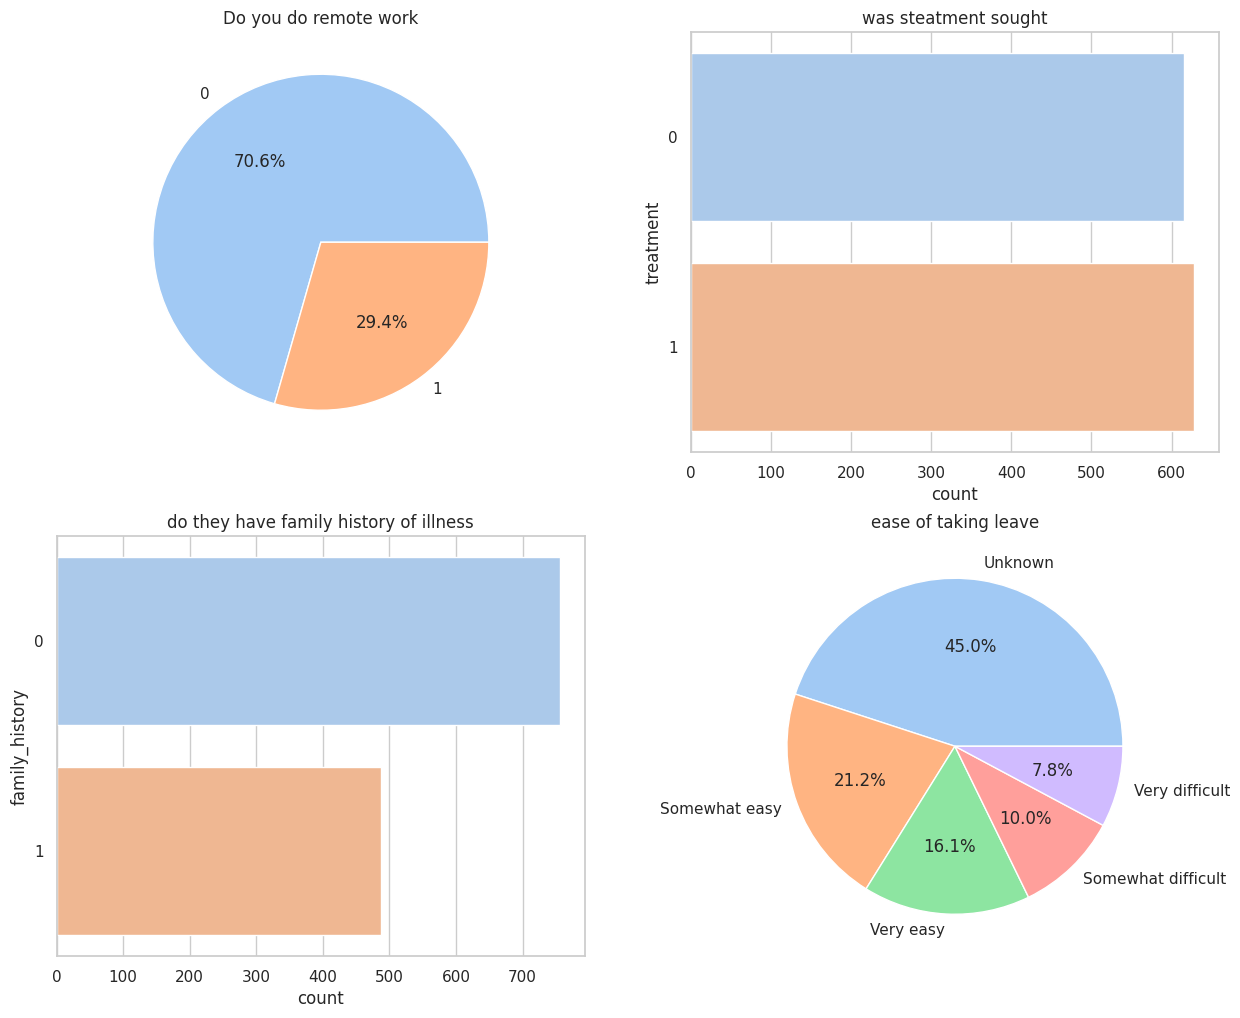

In [17]:
fig,axs=plt.subplots(2,2,figsize=(15,12))
axs[0][0].pie(df['remote_work'].value_counts(),
                labels=df['remote_work'].value_counts().index, autopct='%1.1f%%')
axs[0][0].set_title("Do you do remote work")

sns.countplot(data=df,y='treatment',ax=axs[0][1])
axs[0][1].set_title('was steatment sought')

sns.countplot(data=df,y='family_history',ax=axs[1][0])
axs[1][0].set_title('do they have family history of illness')

axs[1][1].pie(df['leave'].value_counts(),
                labels=df['leave'].value_counts().index, autopct='%1.1f%%')
axs[1][1].set_title("ease of taking leave")

Text(0.5, 1.0, 'mental health taken equally seriosuly?')

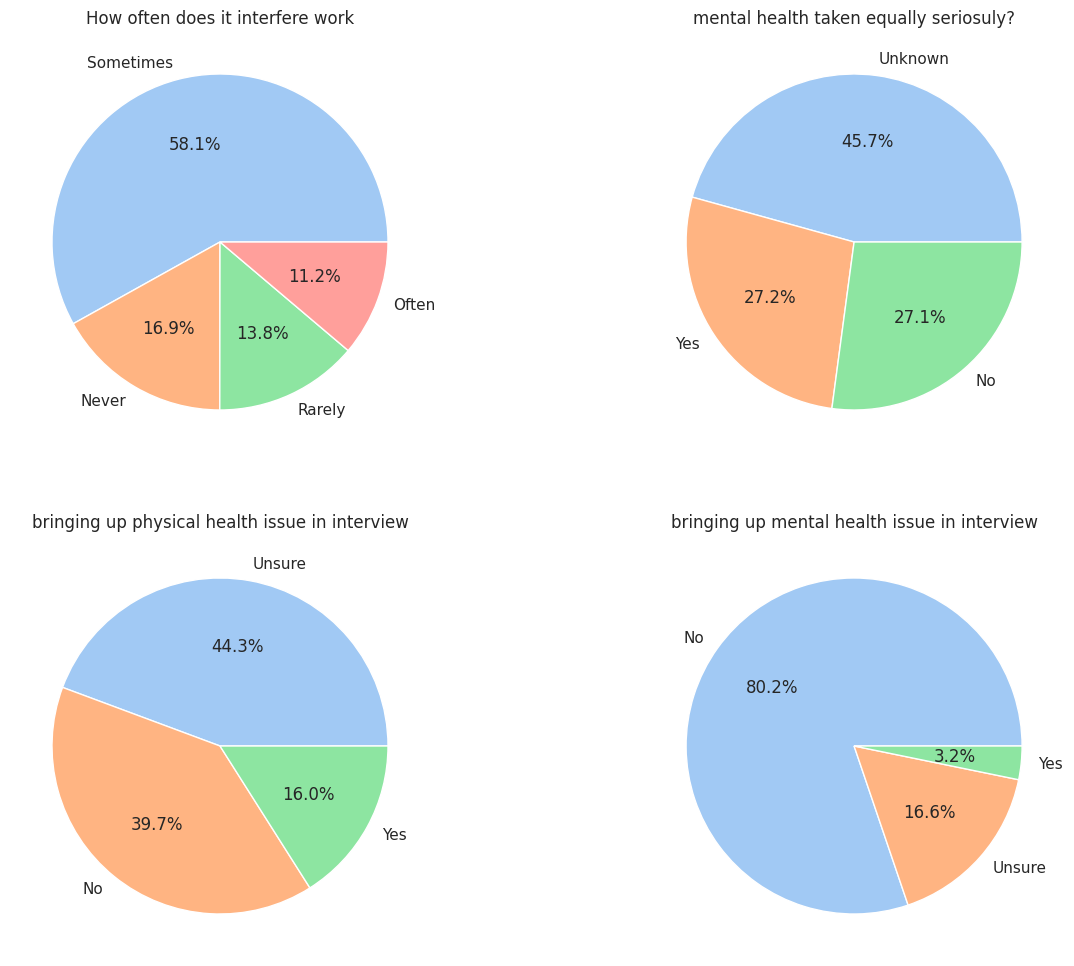

In [18]:
wmap={1:'Often',0.75:'Sometimes',0.25:'Rarely',0:'Never'}
df['temp_work_interfere']=df['work_interfere'].map(wmap)


fig,axs=plt.subplots(2,2,figsize=(15,12))
axs[0][0].pie(df['temp_work_interfere'].value_counts(),
                labels=df['temp_work_interfere'].value_counts().index, autopct='%1.1f%%')
axs[0][0].set_title("How often does it interfere work")

axs[1][1].pie(df['mental_health_interview'].value_counts(),
                labels=df['mental_health_interview'].value_counts().index, autopct='%1.1f%%')
axs[1][1].set_title("bringing up mental health issue in interview")

axs[1][0].pie(df['phys_health_interview'].value_counts(),
                labels=df['phys_health_interview'].value_counts().index, autopct='%1.1f%%')
axs[1][0].set_title("bringing up physical health issue in interview")

axs[0][1].pie(df['mental_vs_physical'].value_counts(),
                labels=df['mental_vs_physical'].value_counts().index, autopct='%1.1f%%')
axs[0][1].set_title("mental health taken equally seriosuly?")

Text(0.5, 0.98, 'comparision of ease of opening up to coworkers vs supervisors')

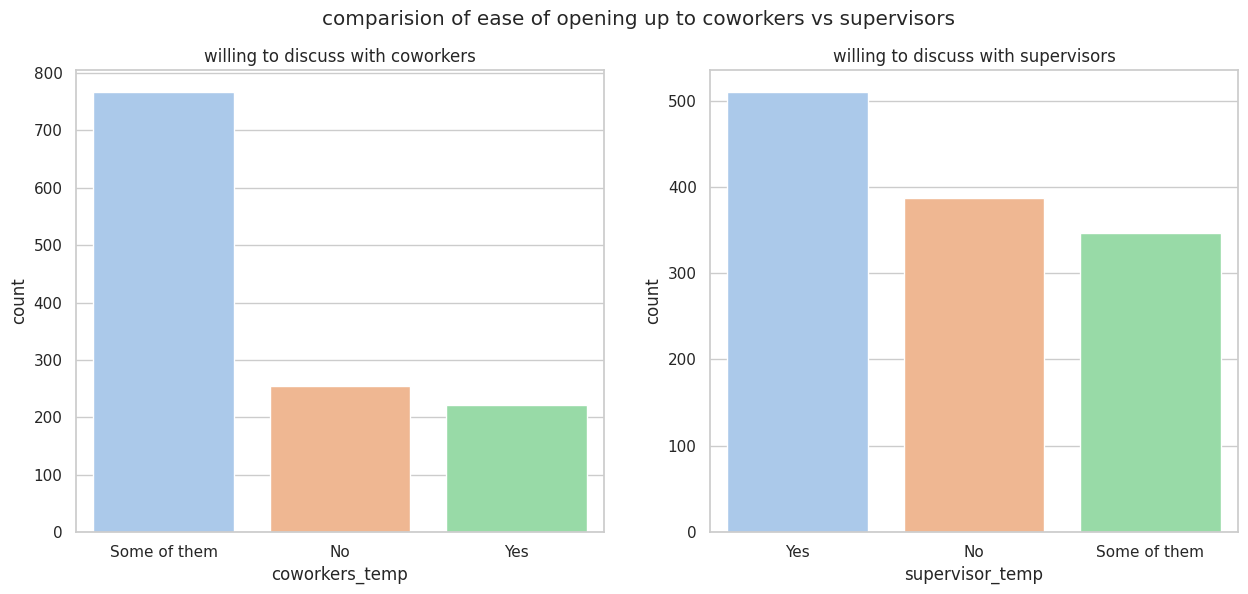

In [19]:
fig,axs=plt.subplots(1,2,figsize=(15,6))

colmap={1:'Yes',0:'No',0.5:'Some of them'}
df['supervisor_temp']=df['supervisor'].map(colmap)
df['coworkers_temp']=df['coworkers'].map(colmap)

sns.countplot(data=df,x='coworkers_temp',ax=axs[0])
axs[0].set_title('willing to discuss with coworkers')

sns.countplot(data=df,x='supervisor_temp',ax=axs[1])
axs[1].set_title('willing to discuss with supervisors')

plt.suptitle('comparision of ease of opening up to coworkers vs supervisors')

Text(0.5, 0.98, 'Company analysis')

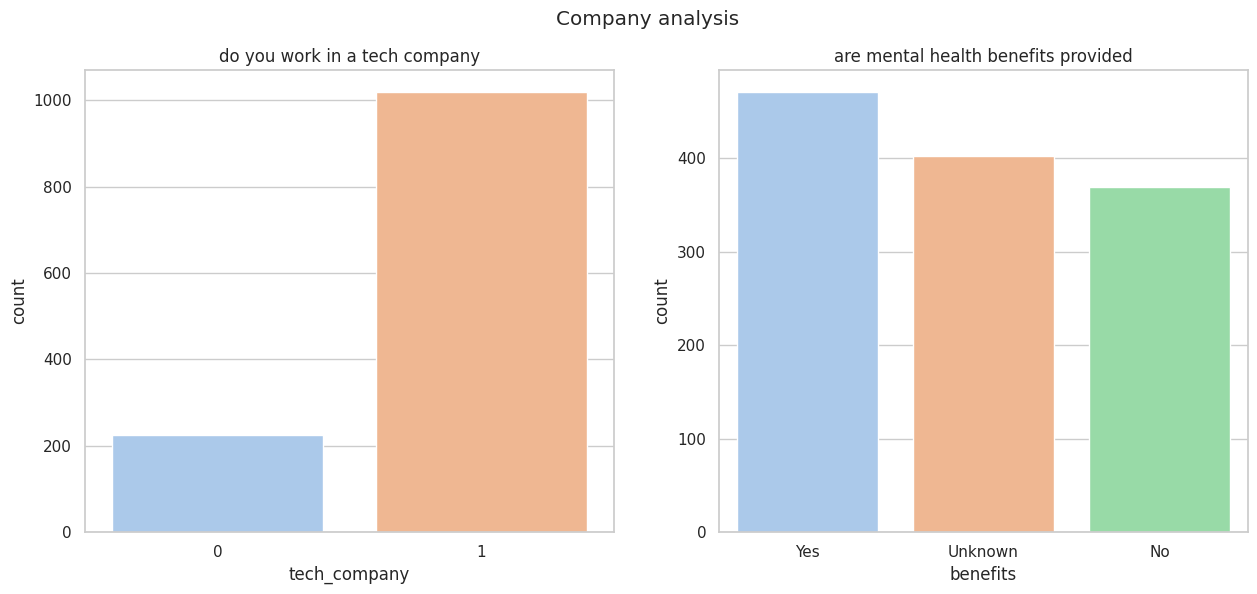

In [20]:
fig,axs=plt.subplots(1,2,figsize=(15,6))
sns.countplot(data=df,x='tech_company',ax=axs[0])
axs[0].set_title("do you work in a tech company")

sns.countplot(data=df,x='benefits',ax=axs[1])
axs[1].set_title("are mental health benefits provided")

plt.suptitle('Company analysis')

## Bivariate analysis

### Analysing various columns wrt the treatment column  

Text(0.5, 1.0, 'country vs treatment')

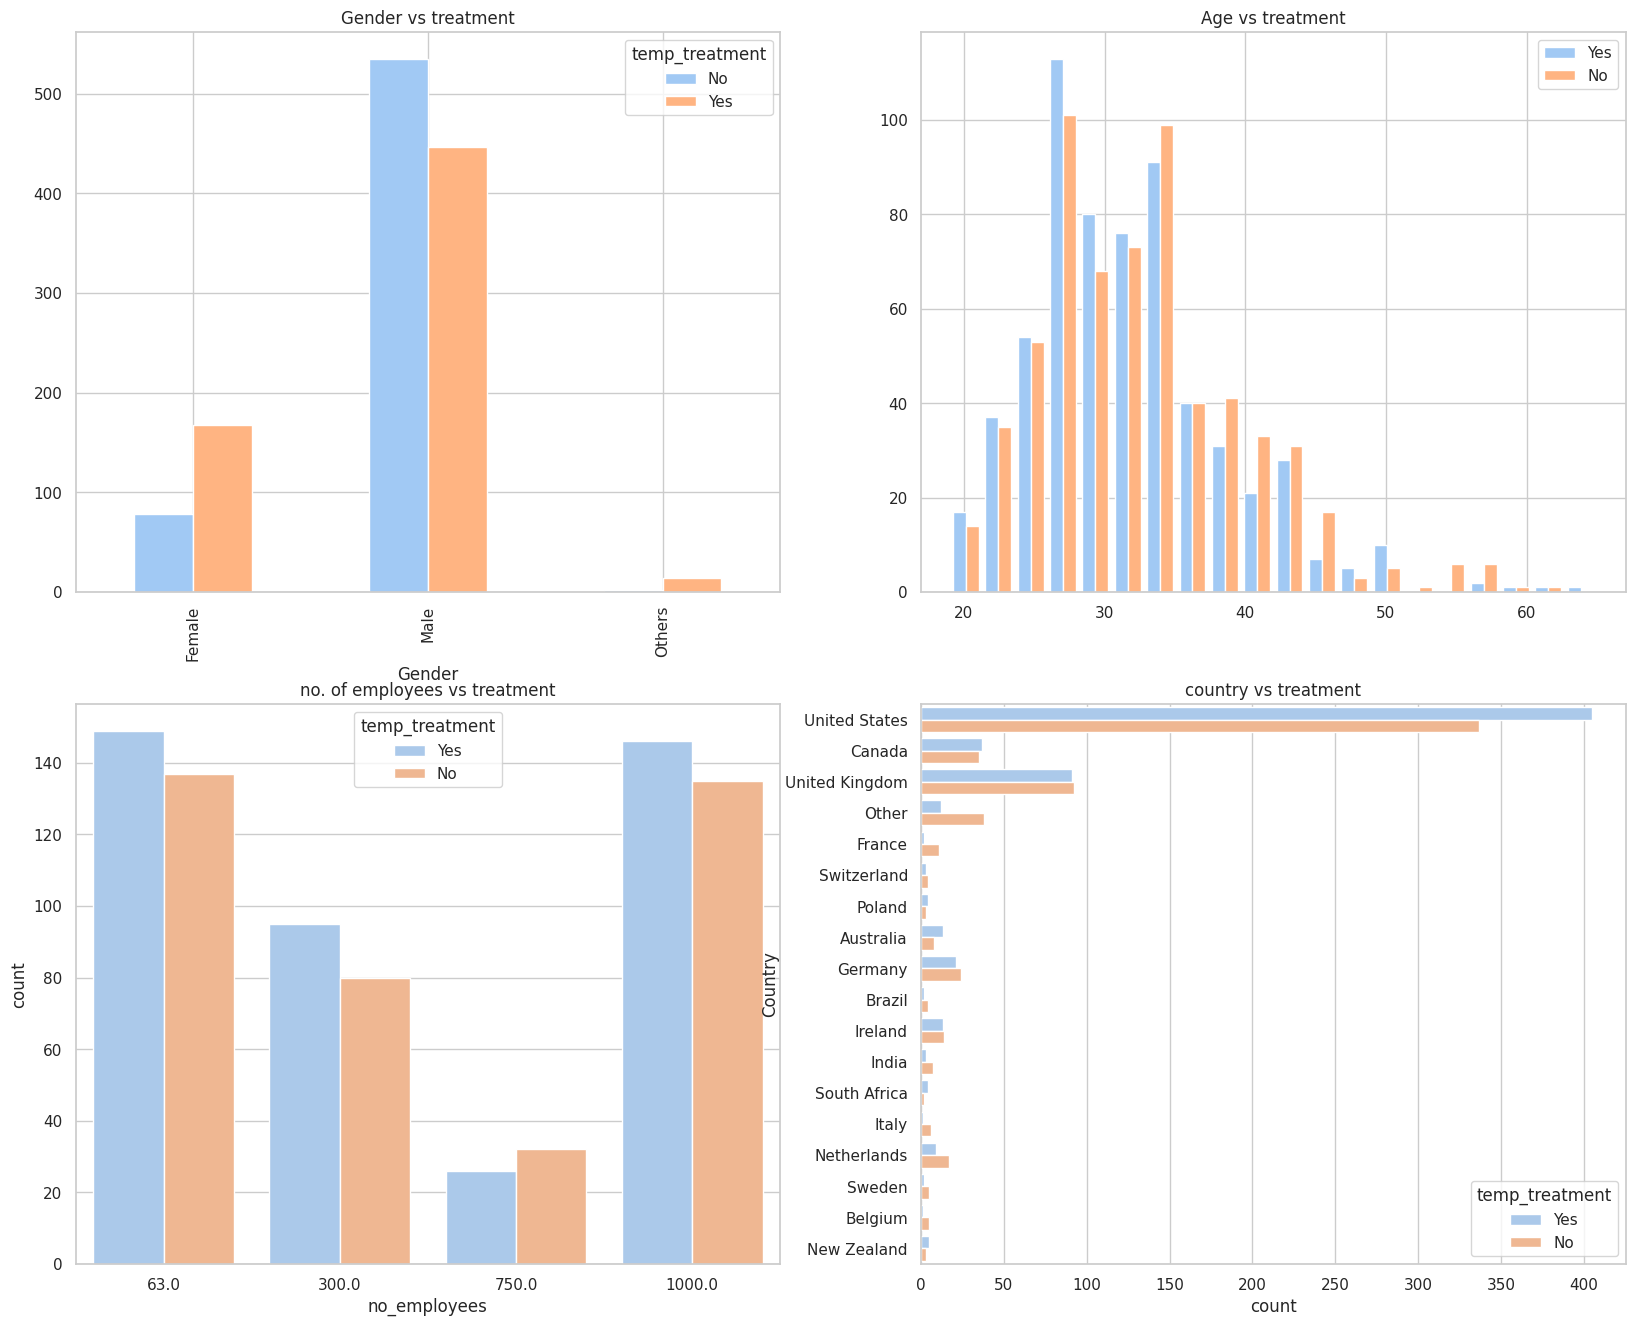

In [21]:
fig,axs=plt.subplots(2,2,figsize=(20,16))
yn={1:'Yes',0:'No'}
df['temp_treatment']=df['treatment'].map(yn)
ct = pd.crosstab(df['Gender'], df['temp_treatment'])
ct.plot(kind='bar',ax=axs[0][0])
axs[0][0].set_title('Gender vs treatment')

axs[0][1].hist([df[df['temp_treatment']=='No']['Age'],
              df[df['temp_treatment']=='Yes']['Age']],bins=20,label=['Yes','No'])
axs[0][1].set_title('Age vs treatment')
axs[0][1].legend()

sns.countplot(data=df,x='no_employees',hue='temp_treatment',ax=axs[1][0])
axs[1][0].set_title('no. of employees vs treatment')

# top10=df['Country'].value_counts().head(10).index
sns.countplot(data=df,y='Country',hue='temp_treatment',ax=axs[1][1])
axs[1][1].set_title('country vs treatment')


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'is mental health taken as seriously as physical')

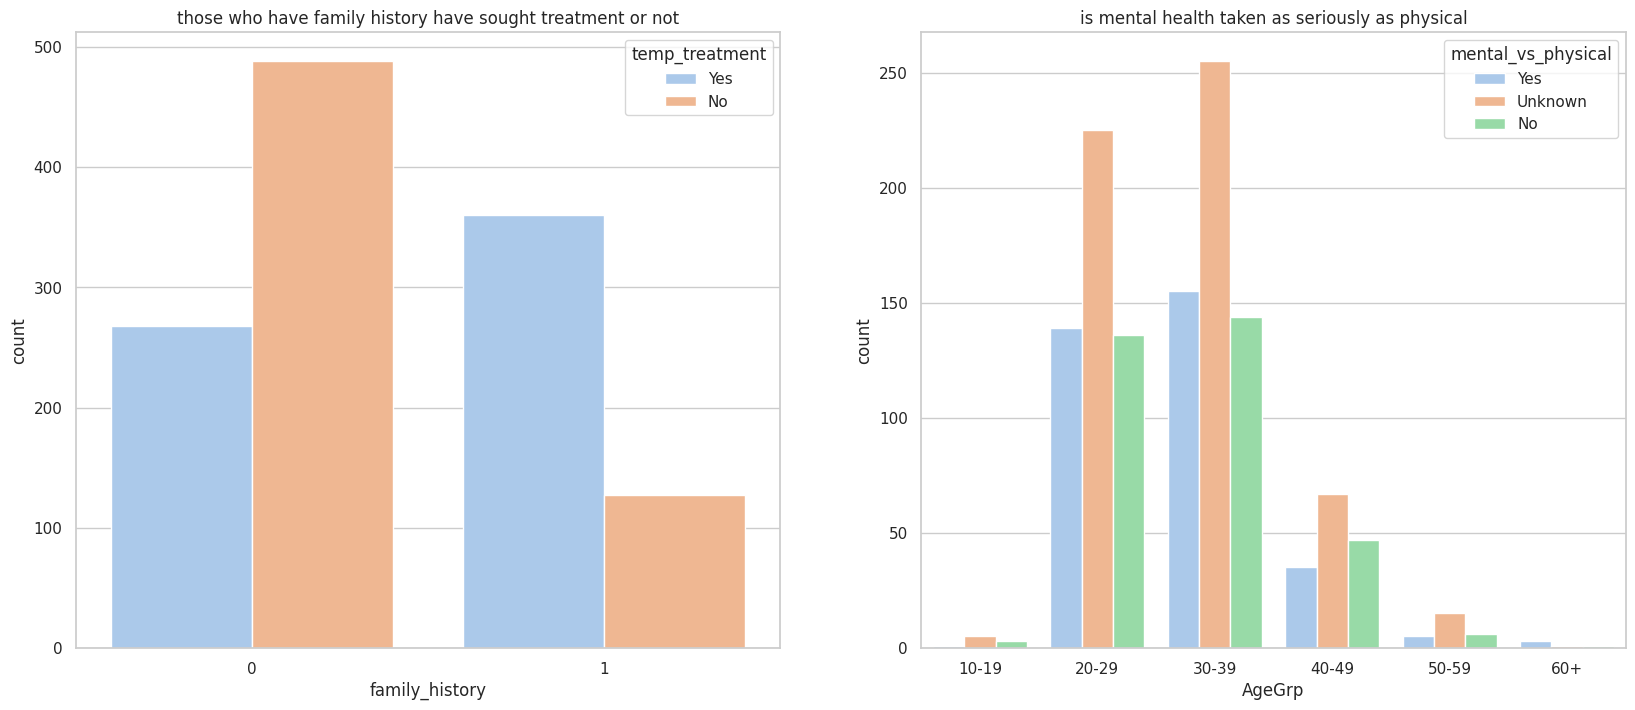

In [22]:
fig,axs=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x='family_history',hue='temp_treatment',data = df,ax=axs[0])
axs[0].set_title('those who have family history have sought treatment or not')

df['AgeGrp'] = pd.cut(df['Age'],
    bins=[10, 19, 29, 39, 49, 59, 120],
    labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60+'])
sns.countplot(x='AgeGrp', hue='mental_vs_physical', data=df,ax=axs[1])

axs[1].set_title('is mental health taken as seriously as physical')

<Axes: xlabel='temp_work_interfere', ylabel='count'>

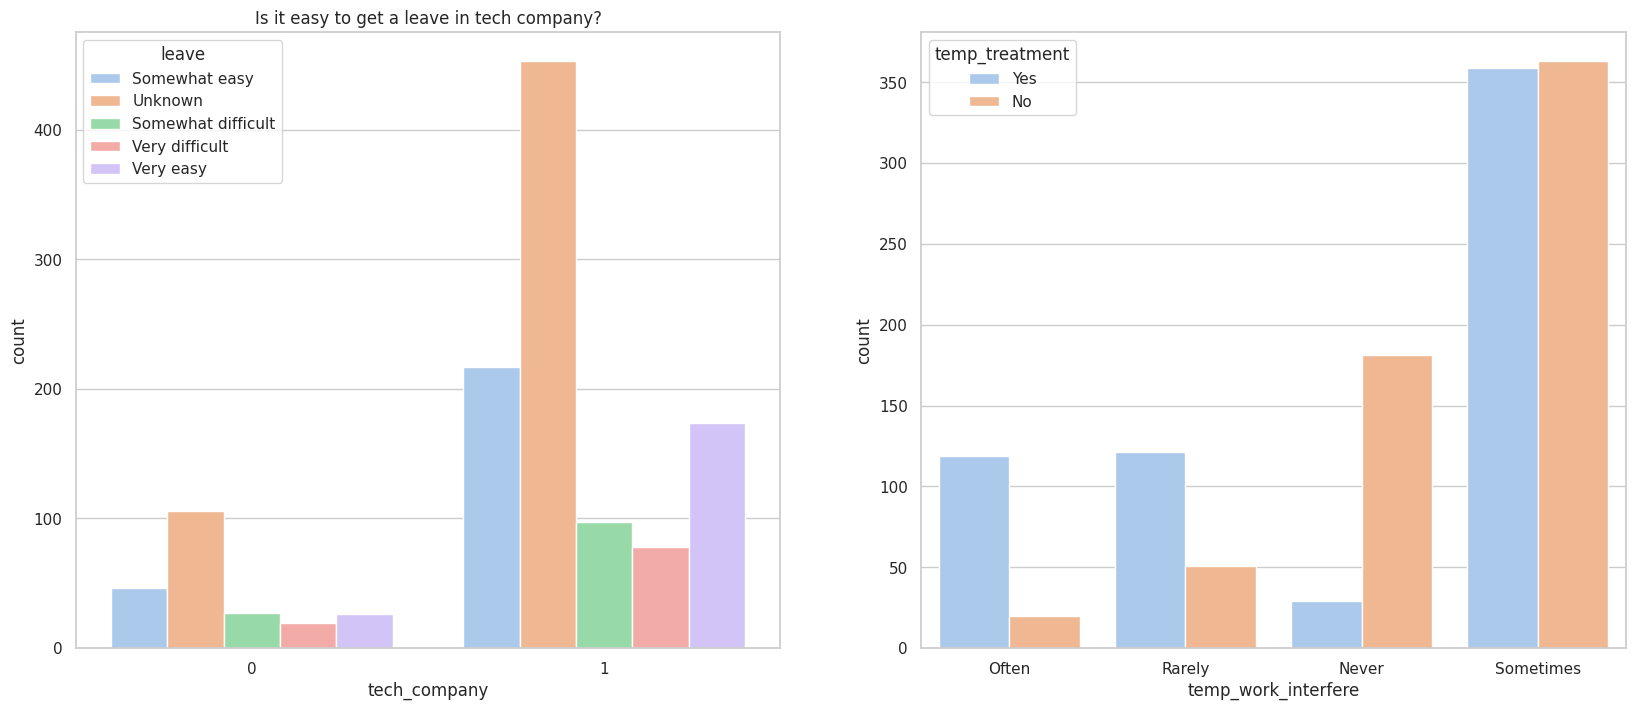

In [23]:
fig,axs=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x='tech_company',hue='leave',data = df,ax=axs[0])
axs[0].set_title('Is it easy to get a leave in tech company?')

sns.countplot(x='temp_work_interfere',hue='temp_treatment',data = df,ax=axs[1])


# Multivariate Analysis

In [24]:

cols=['benefits','wellness_program','seek_help','anonymity','mental_vs_physical',
      'care_options','mental_health_consequence','phys_health_consequence',
      'mental_health_interview','phys_health_interview','leave']
colmap={'Yes':1,'No':0,'Unsure':0.5,'Unknown':0.5,'Very Easy':1,'Somewhat easy':0.75,
        'Somewhat difficult':0.25,'Very difficult':0}
for col in cols:
    df[col]=df[col].map(colmap)

print(df[cols].describe())

          benefits  wellness_program    seek_help    anonymity  \
count  1243.000000       1243.000000  1243.000000  1243.000000   
mean      0.541030          0.256637     0.342317     0.623089   
std       0.409142          0.392290     0.391222     0.268693   
min       0.000000          0.000000     0.000000     0.000000   
25%       0.000000          0.000000     0.000000     0.500000   
50%       0.500000          0.000000     0.000000     0.500000   
75%       1.000000          0.500000     0.500000     1.000000   
max       1.000000          1.000000     1.000000     1.000000   

       mental_vs_physical  care_options  mental_health_consequence  \
count         1243.000000   1243.000000                1243.000000   
mean             0.500402      0.476669                   0.419952   
std              0.368605      0.432965                   0.385198   
min              0.000000      0.000000                   0.000000   
25%              0.000000      0.000000                

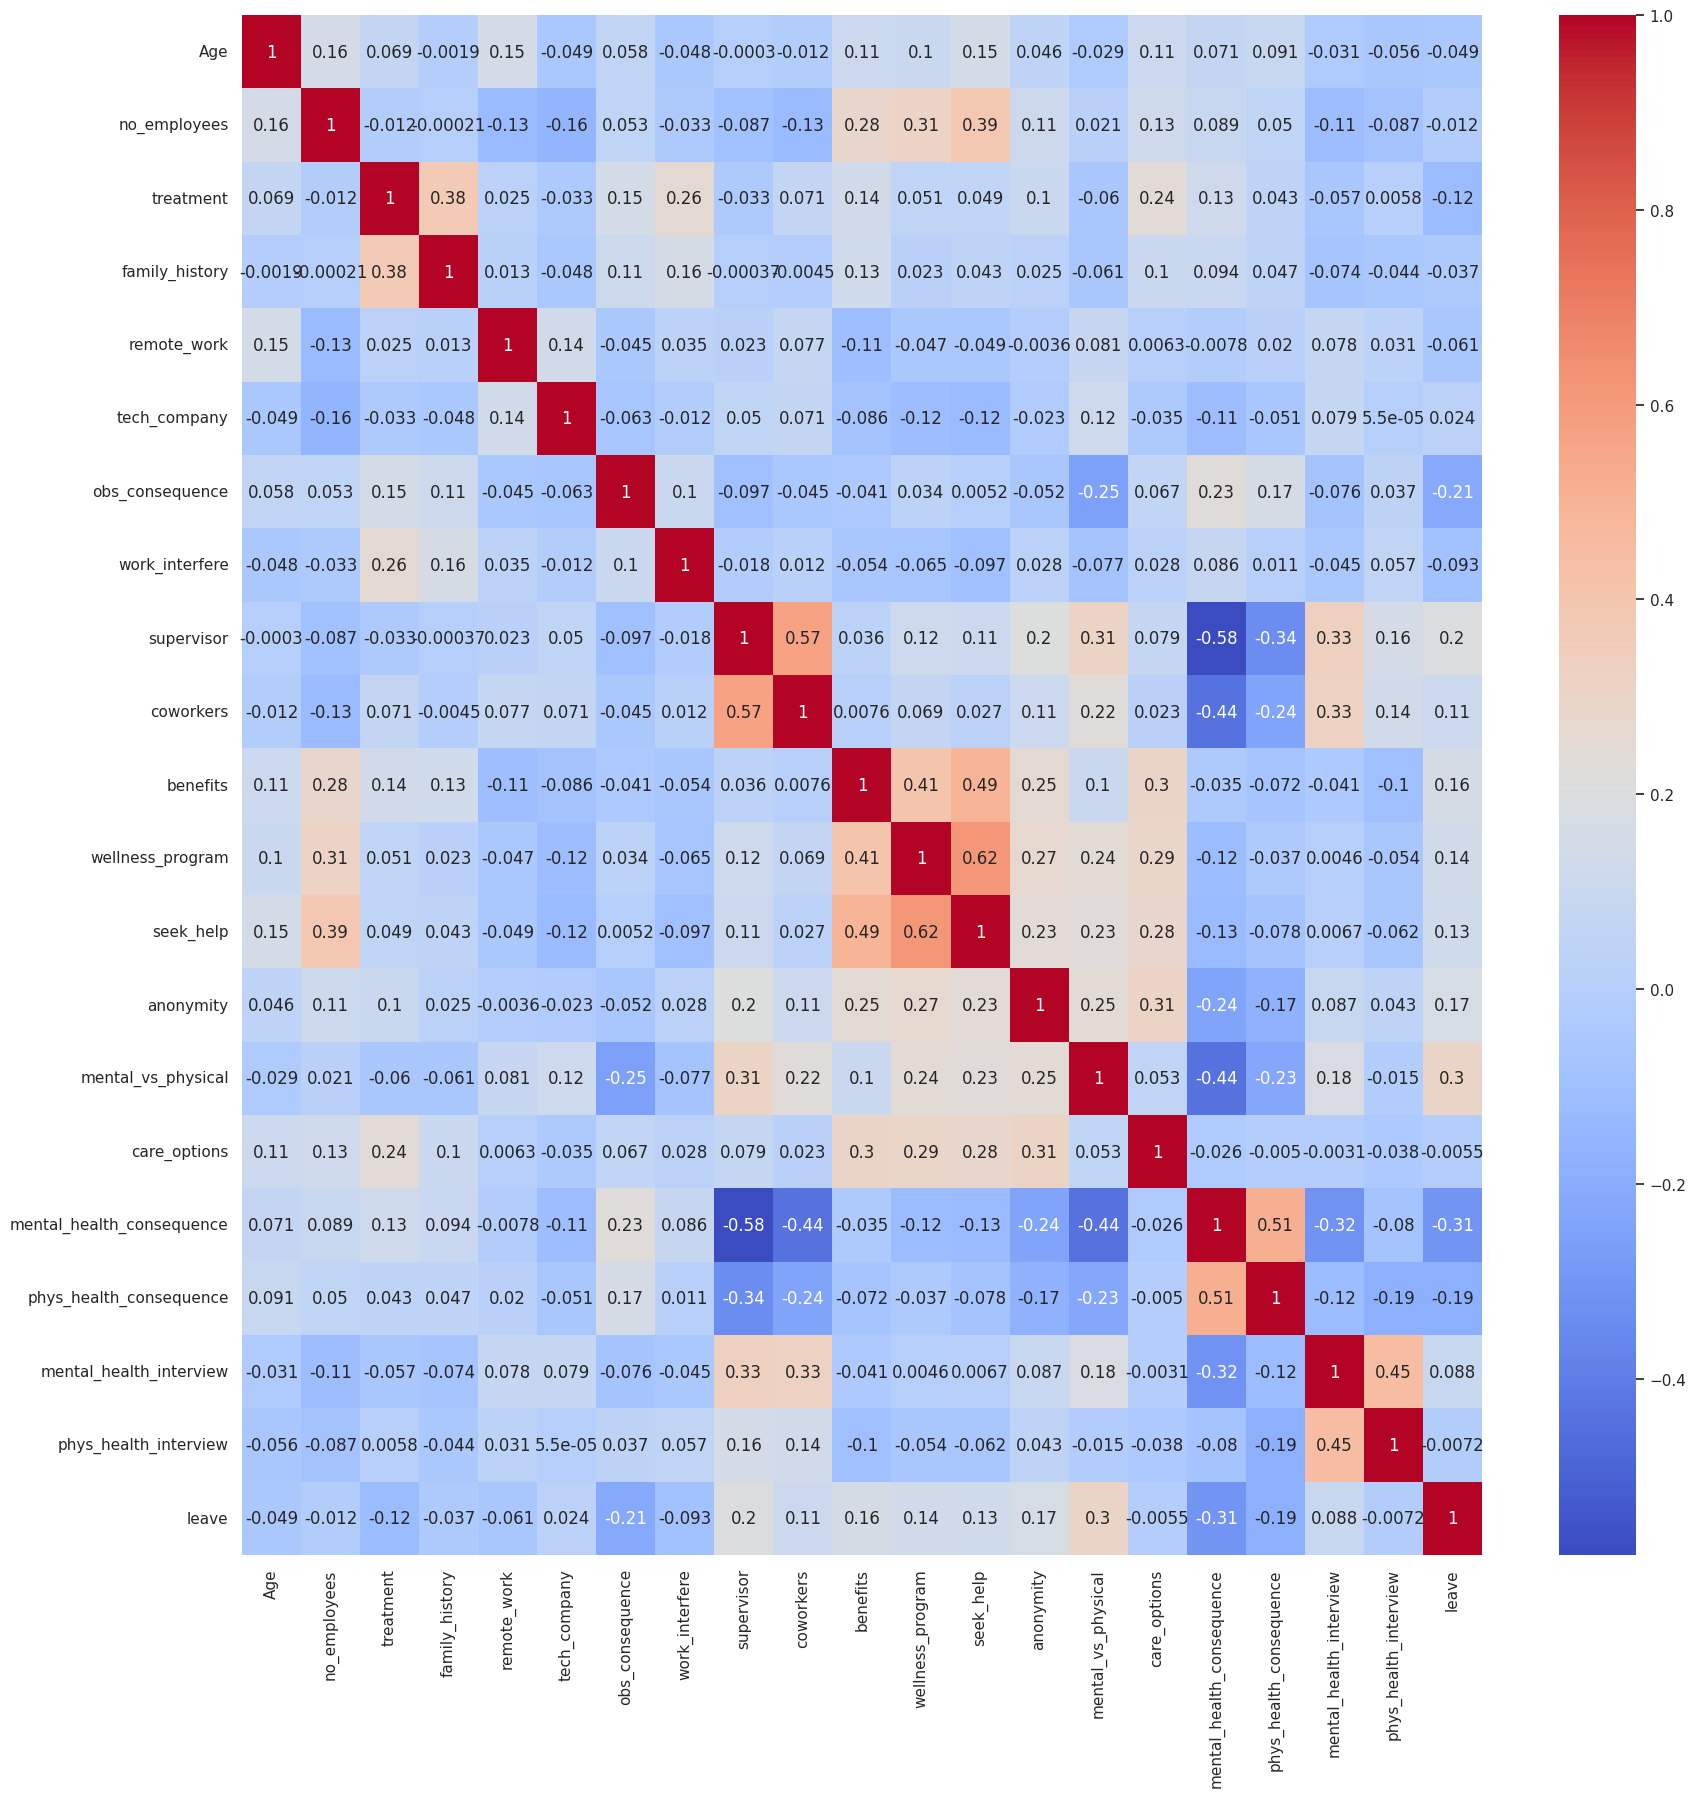

In [25]:
plt.figure(figsize=(20,20))
num_cols=['Age','no_employees','treatment','family_history',
          'remote_work','tech_company','obs_consequence','work_interfere',
         'supervisor','coworkers','benefits','wellness_program','seek_help','anonymity',
          'mental_vs_physical','care_options','mental_health_consequence','phys_health_consequence',
         'mental_health_interview','phys_health_interview','leave']

corr_matrix=df[num_cols].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [26]:
df.to_csv('/kaggle/working/cleandf.csv', index=False)

In [27]:
df.to_pickle("data.pkl")